<a href="https://colab.research.google.com/github/liumOazed/Neural_Network_With_Tensorflow/blob/main/Ex_02_Classification_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

In [ ]:
from sklearn.datasets import make_moons
import numpy as np

In [ ]:
# Make 1000 examples
n_samples= 1000

X,y = make_moons(n_samples, noise=0.03, random_state=42) 

In [ ]:
X[0]

array([-0.00933187,  0.39098105])

In [ ]:
y[0]

1

In [ ]:
import pandas as pd
moons = pd.DataFrame({"X0":X[:,0], "X1": X[:, 1], "label":y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


In [ ]:
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
X[-1,1]

0.6042366167665801

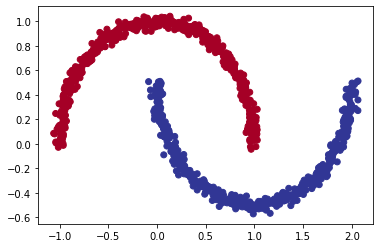

In [ ]:
# Visualize the plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [ ]:
X_train= X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]

# len(X_train),len(X_test), len(y_train), len(y_test)
X_train[0], y_train[0] 

(array([-0.00933187,  0.39098105]), 1)

In [ ]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed =42

# 1. Create the model
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
])

# 2. Compile our model
model_1.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics =["accuracy"])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs =50)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8163
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8800
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.8825
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.8988
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9013
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1991 - accuracy: 0.9013
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9062
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9087
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9137
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9262
Epoch 11/50
25/25 [

In [ ]:
def plot_decision_boundary(model, X, y):  #taking model,then features(X), then labels(y).
  """
  Plots decision boundary created by a model predicting on X."""
  # Define the axis boundaries of the plot and create meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() + 0.1 #Values and boundaries
  y_min, y_max = X[:, 1].min()- 0.1, X[:, 1].max()+0.1 # Same as above
  # Creating a meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (We are going to make prediction on this)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make prediction
  y_pred = model.predict(x_in)

  # Check for multiclass classification
  if len(y_pred[0])> 1:
    print("Doing multiclass Classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap =plt.cm.RdYlBu ) 
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



doing binary classification


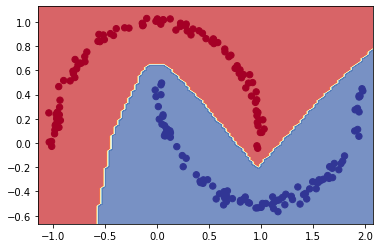

In [ ]:
plot_decision_boundary(model=model_1, X=X_test, y=y_test)

In [ ]:
# Evaluate the model
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0015021853614598513, 1.0]

In [ ]:
model_1.predict(X_test)

array([[9.99296069e-01],
       [9.99361515e-01],
       [9.99519408e-01],
       [9.99965191e-01],
       [4.67602513e-05],
       [3.54086706e-06],
       [9.99799252e-01],
       [2.53526377e-06],
       [9.98569727e-01],
       [8.56608152e-04],
       [9.98948216e-01],
       [5.30000261e-06],
       [9.99913692e-01],
       [9.99996543e-01],
       [9.99995053e-01],
       [9.99993324e-01],
       [9.99972045e-01],
       [9.96834159e-01],
       [6.75174715e-06],
       [9.99431431e-01],
       [3.76178195e-06],
       [9.96318936e-01],
       [9.99482632e-01],
       [9.99402046e-01],
       [3.95454865e-15],
       [9.99008298e-01],
       [9.99996185e-01],
       [3.10556679e-05],
       [6.20296203e-16],
       [9.99932468e-01],
       [9.17977145e-16],
       [9.99543130e-01],
       [9.99990523e-01],
       [3.83647239e-05],
       [6.04307353e-02],
       [9.99533772e-01],
       [9.99885321e-01],
       [9.99991179e-01],
       [9.99847293e-01],
       [9.97242212e-01],


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alrady been sorted for training and testing sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Create a small list so we can index on to our training labels so they are human readable
class_names=["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# We can our training and testing data between 0 & 1 by dividing by the maximum.
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Lets refit the model with ideal learning rate
tf.random.set_seed=42

# 1. Create model
model_2 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(55,activation="relu"),
          tf.keras.layers.Dense(20,activation="relu"),
          tf.keras.layers.Dense(10, activation="softmax")

])

# 2. COmpile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=["accuracy"])

# 3. Fit model
correct_lr_history = model_2.fit(train_data_norm, train_labels,
                            epochs =20,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5169 - accuracy: 0.8148 - val_loss: 0.4279 - val_accuracy: 0.8496
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3886 - accuracy: 0.8587 - val_loss: 0.4067 - val_accuracy: 0.8530
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3542 - accuracy: 0.8698 - val_loss: 0.4012 - val_accuracy: 0.8505
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3336 - accuracy: 0.8777 - val_loss: 0.3615 - val_accuracy: 0.8720
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8819 - val_loss: 0.3665 - val_accuracy: 0.8698
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.8856 - val_loss: 0.3933 - val_accuracy: 0.8622
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8902 - val_loss: 0.3638 - val_accuracy:

In [ ]:
# Lets make some predictions with our model
y_probs = model_2.predict(test_data_norm)

In [ ]:
y_preds = y_probs.argmax(axis=1)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  


  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
  

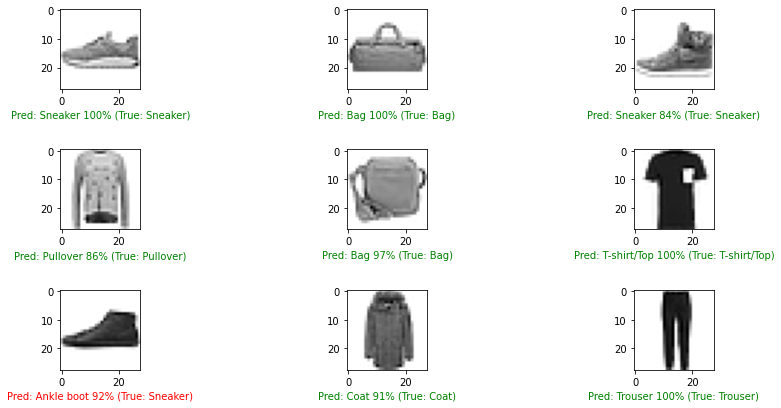

In [ ]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_random_image(model_2, images=test_data_norm, true_labels= test_labels, classes = class_names)
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Create a confusion matrix
# Note the confusion matrix we are about to learn is a remix of scikit learns plot_confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes= None, figsize =(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix, also np.newaxis is used to increase shape/dimension
  n_classes= cm.shape[0]

  # lets prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks= np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels =labels,
        )

  # Set X-axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # Set the threshold for different colors
  threshold = (cm.max()+ cm.min())/2

  # Plot texts on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color = "white" if cm[i,j] > threshold else "black",
            size= text_size)

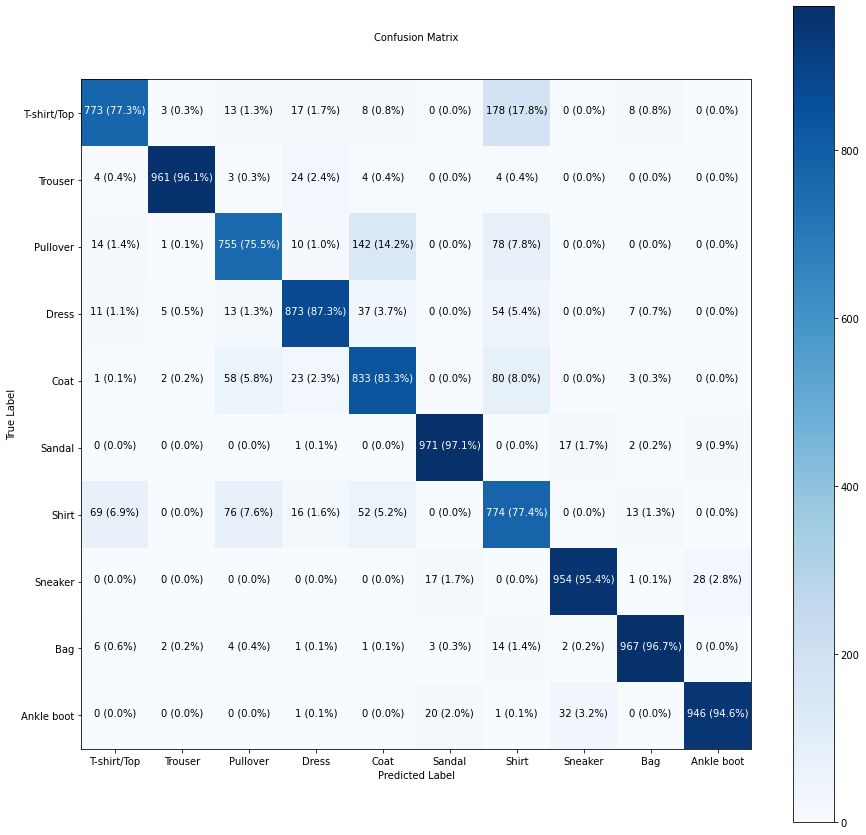

In [ ]:
make_confusion_matrix(y_true=test_labels, y_pred = y_preds,
                      classes =class_names, figsize = (15,15),
                      text_size=10)